In [1]:
import pandas as pd
import numpy as np

Check for null values in the numerical columns.

Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

Use appropriate EDA technique where ever necessary.

In [22]:
numerical = pd.read_csv('numerical.csv')

In [23]:
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,0.0,NaN,0,0,39,34,...,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,5.0,9512,9001,9101.0,12.0,7.481481,15078,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,10.0,9512,8702,8711.0,9.0,6.812500,172556,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,15.0,9601,7903,8005.0,14.0,6.864865,7112,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,61.611649,0.0,NaN,0,14,36,47,...,25.0,9602,9602,NaN,8.0,25.000000,184568,0,1,12.0
95408,9601,1,5001,48.000000,7.0,9.0,1,0,31,43,...,20.0,9603,9603,NaN,8.0,20.000000,122706,1,1,2.0
95409,9501,1,3801,60.000000,0.0,NaN,0,0,18,46,...,10.0,9610,9410,9501.0,3.0,8.285714,189641,1,3,34.0
95410,8601,0,4005,58.000000,7.0,NaN,0,0,28,35,...,18.0,9701,8612,8704.0,4.0,12.146341,4693,1,4,11.0


In [19]:
categorical = pd.read_csv('categorical_df.csv')

In [20]:
categorical

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,CLUSTER,HOMEOWNR,GENDER,DATASRCE,...,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,A,0,XXXX,36,U,F,U,...,S4E,S4E,L,E,X,X,X,C,T,2
1,BOA,CA,91326,A,0,XXXX,14,H,M,3,...,L1E,NaN,L,G,X,X,X,A,S,1
2,AMH,NC,27017,A,0,XXXX,43,U,M,3,...,S4F,S4D,L,E,X,X,X,C,R,2
3,BRY,CA,95953,A,0,XXXX,44,U,F,3,...,S4E,S2D,L,E,X,X,X,C,R,2
4,NaN,FL,33176,A,0,XXXX,16,H,F,3,...,L3D,A2D,L,F,X,X,X,A,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,OTHER,99504,A,0,XXXX,27,U,M,U,...,NaN,NaN,L,G,X,X,X,C,C,2
95408,DCD,TX,77379,A,0,XXXX,24,H,M,3,...,NaN,NaN,L,F,X,X,X,A,C,1
95409,MBC,MI,48910,A,0,XXXX,30,U,M,U,...,F1D,F1D,L,E,X,X,X,B,C,3
95410,PRV,CA,91320,A,0,XXXX,24,H,F,2,...,S3F,S2F,L,F,X,X,X,A,C,1


In [25]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name','nulls']
df = df[df['nulls']>0]
df

,column_name,nulls
5,WEALTH1,44732
134,MSA,132
135,ADI,132
136,DMA,132
316,NEXTDATE,9973


In [30]:
numerical.drop(['NEXTDATE'],axis=1,inplace=True)

In [31]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name','nulls']
df = df[df['nulls']>0]
df

,column_name,nulls
5,WEALTH1,44732
134,MSA,132
135,ADI,132
136,DMA,132


In [38]:
categorical['GEOCODE2'].isna().sum()

0

In [39]:
categorical['GEOCODE2'].value_counts() 

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [32]:
numerical['WEALTH1'].value_counts()

9.0    7585
8.0    6793
7.0    6198
6.0    5825
5.0    5280
4.0    4810
3.0    4237
2.0    4085
1.0    3454
0.0    2413
Name: WEALTH1, dtype: int64

In [40]:
numerical['WEALTH1'].isna().sum()

44732

In [47]:
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(numerical['WEALTH1'].mode())


In [41]:
numerical['DMA'].isna().sum()

132

<AxesSubplot:xlabel='DMA', ylabel='Count'>

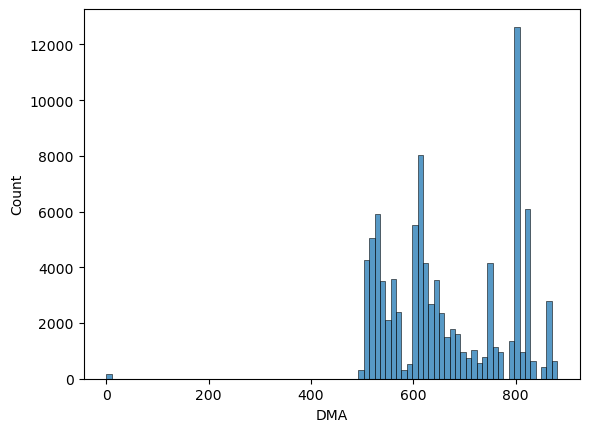

In [48]:
import seaborn as sns

sns.histplot(numerical['DMA'])

In [49]:
numerical['DMA'] = numerical['DMA'].fillna(numerical['DMA'].mean())

<AxesSubplot:xlabel='DMA', ylabel='Count'>

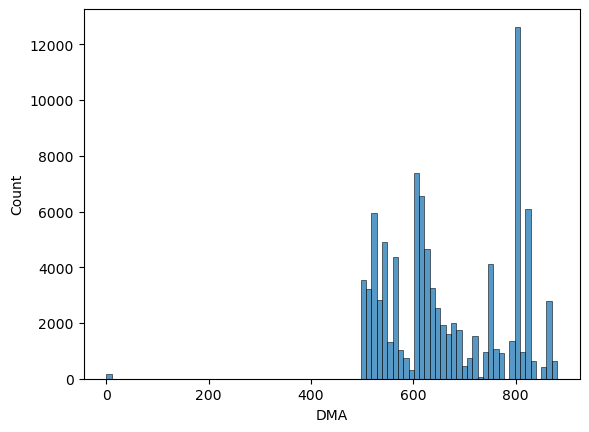

In [50]:
sns.histplot(numerical['DMA'])

In [44]:
numerical['MSA'].isna().sum()

132

In [51]:
numerical['MSA'] = numerical['MSA'].fillna(numerical['MSA'].mean())

In [54]:
df2 = pd.DataFrame(categorical.isna().sum()).reset_index()
df2.columns = ['column_name','nulls']
df2 = df2[df2['nulls']>0]

In [55]:
df2

,column_name,nulls
0,OSOURCE,928
4,NOEXCH,7
8,GENDER,2957
10,SOLIH,89212
11,VETERANS,84986
13,RFA_3,1950
14,RFA_4,2312
15,RFA_6,3557
16,RFA_7,8874
17,RFA_8,3511


In [60]:
categorical.drop(['OSOURCE','NOEXCH','GENDER','SOLIH','VETERANS','RFA_3','RFA_4','RFA_6','RFA_7','RFA_8','RFA_9','RFA_11','RFA_12','RFA_14','RFA_16','RFA_18'],axis=1,inplace=True)

In [61]:
categorical.to_csv('categorical_df.csv',index=False)
numerical.to_csv('numerical.csv',index=False)